<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework1_P2_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/Intro-to-ML/D3.csv'
df = pd.DataFrame(pd.read_csv(file_path))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Separate features and labels
X = df.values[:, :3]  # get input X values from first three columns
y = df.values[:, 3]  # get output Y values from fourth column
m = len(y)  # Number of training examples
n = len(X)  # Number of training examples

# Create a column vector of ones. This will be used as the "bias" term for the linear regression model.
X_0 = np.ones((m, 1))
# Horizontally stack X_0 and X_1 to create final feature matrix X.
X = np.hstack((X_0, X))
theta = np.zeros(4)

In [49]:
def compute_cost(X, y, theta):
    """
    Compute cost for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represent the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)

    Returns:
    J : Scalar value, the cost
    """
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)
    return J

In [50]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    Compute the optimal parameters using gradient descent for linear regression.

    Parameters:
    X : 2D array where each row represents the training example and each column represents the feature
        m = number of training examples
        n = number of features (including X_0 column of ones)
    y : 1D array of labels/target values for each training example. dimension(m)
    theta : 1D array of fitting parameters or weights. Dimension (n)
    alpha : Learning rate (scalar)
    iterations : Number of iterations (scalar)

    Returns:
    theta : Updated values of fitting parameters or weights after 'iterations' iterations. Dimension (n)
    cost_history : Array containing the cost for each iteration. Dimension (iterations)
    """

    m = len(y)  # Number of training examples
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

In [51]:
alpha_values = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
iterations = 1500

for alpha in alpha_values:
    theta = np.zeros(4)
    theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
    print(f'Alpha = {alpha}')
    print('Final value of theta =', theta)
    print('cost_history =', cost_history[-1:])
    print('\n')

Alpha = 0.01
Final value of theta = [ 4.15118728 -1.8394291   0.72473856 -0.09513266]
cost_history = [0.81051044]


Alpha = 0.02
Final value of theta = [ 5.0540181  -1.96696891  0.57555136 -0.2274693 ]
cost_history = [0.74206929]


Alpha = 0.03
Final value of theta = [ 5.25606097 -1.99551081  0.54216503 -0.25708468]
cost_history = [0.73864409]


Alpha = 0.04
Final value of theta = [ 5.30120817 -2.0018886   0.53470473 -0.26370234]
cost_history = [0.73847319]


Alpha = 0.05
Final value of theta = [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
cost_history = [0.73846469]


Alpha = 0.06
Final value of theta = [ 5.3135255  -2.00362862  0.53266937 -0.26550781]
cost_history = [0.73846426]


Alpha = 0.07
Final value of theta = [ 5.31402471 -2.00369914  0.53258688 -0.26558098]
cost_history = [0.73846424]


Alpha = 0.08
Final value of theta = [ 5.31413559 -2.00371481  0.53256855 -0.26559724]
cost_history = [0.73846424]


Alpha = 0.09
Final value of theta = [ 5.31416018 -2.00371828  0.53256449

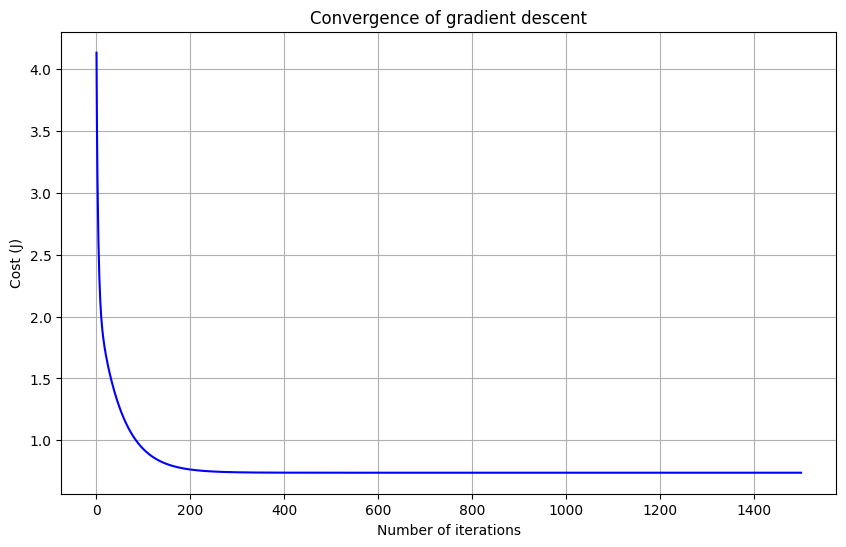

In [52]:
plt.plot(range(1, iterations + 1), cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10, 6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')

# Show the plot
plt.show()